In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, sys
import copy
import itertools
import tensorflow as tf
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from pylab import *
from pyhdf.SD import SD, SDC
from osgeo import gdal

In [5]:
sys.path.insert(1, os.path.join(sys.path[0], "/home/tkurihana/scratch-midway2/data/MOD06/"))
from analysis_lib import _get_swath, _load_tif_data, cv2_interpolation, _main_get_itpl_patches
from analysis_lib import _get_colors, _gen_patches, _anl_agl, cluster_plotting2, _gen_patch_list
from analysis_lib import _get_laplacian
from analysis_lib import _get_cluster_mean
from analysis_lib import cluster_plotting2, cluster_plotting

In [11]:
import glob

In [6]:
gee_datadir='/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016'

In [20]:
day='30'
fbasename='_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-'
# get files
tif_filelist = []
tif_filelist += glob.glob(gee_datadir+'/'+'2015-09-'+str(day)+'*')

In [21]:
tif_filelist

['/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016/2015-09-30_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-0000017664-0000000000.tif',
 '/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016/2015-09-30_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-0000000000-0000070656.tif',
 '/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016/2015-09-30_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-0000017664-0000070656.tif',
 '/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016/2015-09-30_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-0000017664-0000035328.tif',
 '/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016/2015-09-30_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-0000017664-0000017664.tif',
 '/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016/2015-09-30_MOD09GA_background_removal_zero_inp

In [22]:
swath_array = []
for tif_filename in tif_filelist:
    swath_array += [ _get_swath("", tif_filename) ]

 Shape  (9054, 17664, 7)
 Shape  (17664, 9496, 7)
 Shape  (9054, 9496, 7)
 Shape  (9054, 17664, 7)
 Shape  (9054, 17664, 7)
 Shape  (17664, 17664, 7)
 Shape  (9054, 17664, 7)
 Shape  (17664, 17664, 7)
 Shape  (17664, 17664, 7)
 Shape  (17664, 17664, 7)


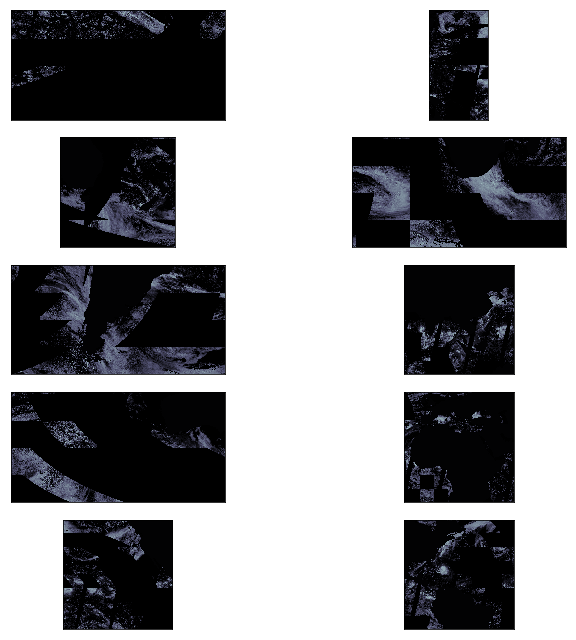

In [28]:
fig = plt.figure(figsize=(12,9))
for idx, iarray in enumerate(swath_array):
    ax = plt.subplot(5,2,idx+1)
    plt.imshow(iarray[:,:,0], cmap='bone')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()

In [29]:
model_dir = "/home/tkurihana/clouds/output/m9-22_oceans/" 
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder.h5'
with open(ENCODER_DEF,"r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
encoder.load_weights(ENCODER_WEIGHTS)

/home/tkurihana/.conda/envs/py3501/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [ ]:
patches_list = []
for iswath in swath_array:
    patches_list += [ _gen_patches(iswath, normalization=True) ]